<a href="https://colab.research.google.com/github/talkin24/GradientBoosting/blob/main/Ch04_from_GB_to_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/GradientBoosting

Mounted at /content/drive
/content/drive/MyDrive/GradientBoosting


In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

import xgboost as xgb
xgb.set_config(verbosity=0)

AttributeError: ignored

In [3]:
df_bikes = pd.read_csv('./bike_rentals_cleaned.csv')
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [4]:
X_bikes = df_bikes.iloc[:, :-1]
y_bikes = df_bikes.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [5]:
from sklearn.tree import DecisionTreeRegressor
tree_1 = DecisionTreeRegressor(max_depth=2, random_state=2)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [6]:
y_train_pred = tree_1.predict(X_train)

In [7]:
y2_train = y_train - y_train_pred

In [8]:
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2)
tree_2.fit(X_train, y2_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [9]:
y2_train_pred = tree_2.predict(X_train)
y3_train = y2_train - y2_train_pred
tree_3 = DecisionTreeRegressor(max_depth=2, random_state=2)
tree_3.fit(X_train, y3_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [10]:
y1_pred = tree_1.predict(X_test)
y2_pred = tree_2.predict(X_test)
y3_pred = tree_3.predict(X_test)

In [11]:
y_pred = y1_pred + y2_pred + y3_pred

In [12]:
from sklearn.metrics import mean_squared_error as MSE

MSE(y_test, y_pred) ** 0.5

911.0479538776444

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                random_state=2, learning_rate=1.0)

In [15]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred) ** 0.5

911.0479538776439

In [16]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=30,
                                random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred) ** 0.5

857.1072323426944

In [17]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300,
                                random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred) ** 0.5

936.3617413678853

In [18]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300,
                                random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred) ** 0.5

653.7456840231495

In [19]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]

In [20]:
for value in learning_rate_values:
  gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300,
                                  random_state=2, learning_rate=value)
  gbr.fit(X_train, y_train)
  y_pred = gbr.predict(X_test)
  rmse = MSE(y_test, y_pred)**0.5
  print('lr:', value, ', score:', rmse)

lr: 0.001 , score: 1633.0261400367258
lr: 0.01 , score: 831.5430182728547
lr: 0.05 , score: 685.0192988749717
lr: 0.1 , score: 653.7456840231495
lr: 0.15 , score: 687.666134269379
lr: 0.2 , score: 664.312804425697
lr: 0.3 , score: 689.4190385930236
lr: 0.5 , score: 693.8856905068778
lr: 1.0 , score: 936.3617413678853


In [21]:
depths = [None, 1, 2, 3, 4]
for depth in depths:
  gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=300,
                                  random_state=2)
  gbr.fit(X_train, y_train)
  y_pred = gbr.predict(X_test)
  rmse = MSE(y_test, y_pred)**0.5
  print('Max depth:', depth, ', score:', rmse)

Max depth: None , score: 869.2788645118395
Max depth: 1 , score: 707.8261886858736
Max depth: 2 , score: 653.7456840231495
Max depth: 3 , score: 646.4045923317708
Max depth: 4 , score: 663.048387855927


In [22]:
gbr.init_

DummyRegressor()

In [23]:
len(gbr.estimators_)

300

In [25]:
import matplotlib.pyplot as plt

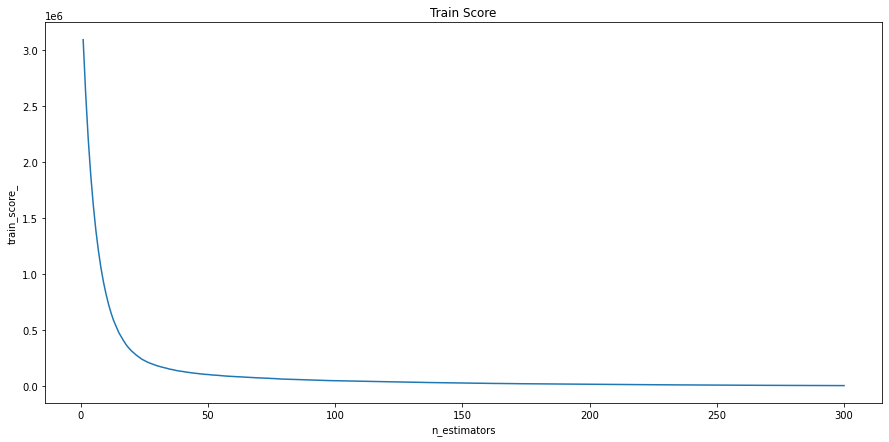

In [26]:
plt.figure(figsize=(15, 7))
plt.plot(range(1, 301), gbr.train_score_)
plt.xlabel('n_estimators')
plt.ylabel('train_score_')
plt.title('Train Score')
plt.show()